In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import glob

CALIBRATION_FILE = 'calibration/out/C.mat'
sns.set_style("whitegrid")
sns.set_style("ticks",{'axes.grid' : False, 'grid.linestyle': '--', 'grid.color':'black'})
sns.set_palette("bright")

all_ee= {}

# 4cm data files

In [2]:
FOUR_FILES = glob.glob("experiment_data/blue_feet/4/important_experiments/*.txt")
print len(FOUR_FILES)
FOUR_DFS = map(lambda x: utils.process_data_files(x, CALIBRATION_FILE), FOUR_FILES)
print len(FOUR_DFS)
# four_cycles = map(utils.get_leg_cycles, FOUR_DFS)
# four_cycles_sorted = sorted(four_cycles)
# inside_channel=[]

interval_times = [[(6500,7500),(10500,11500)],[(6500,7500),(10500,11500)],[(6500,7500),(11500,12500)],
                  [(6500,7500),(10500,11500)],[(7500,8500),(11500,12500)]]

intervals_dict = {}
for i in xrange(len(interval_times)):
    intervals_dict[i] = interval_times[i]
    
print intervals_dict

four_ee = []
i = 0
for df in FOUR_DFS:
    start = df['Right Leg Pos'][intervals_dict[i][0][0]:intervals_dict[i][0][1]].argmax()
    end = df['Right Leg Pos'][intervals_dict[i][1][0]:intervals_dict[i][1][1]].argmax()
    starts = np.arange(start, end, step=1000)
    ends = np.arange(start+1000, end+1000, step=1000)
    intervals = np.vstack((starts, ends)).T
    elec_energies = utils.get_electrical_energy_from_list(df, False, intervals)
    four_ee.append(elec_energies)
    i+=1

print len(four_ee)
print four_ee
four_ee_flattened=reduce(lambda x,y: x+y,four_ee)
print four_ee_flattened
all_ee["4"]=four_ee_flattened



5
5
{0: [(6500, 7500), (10500, 11500)], 1: [(6500, 7500), (10500, 11500)], 2: [(6500, 7500), (11500, 12500)], 3: [(6500, 7500), (10500, 11500)], 4: [(7500, 8500), (11500, 12500)]}
electrical energy cont(mJ): 2017.24944007
electrical energy cont(mJ): 2015.65436894
electrical energy cont(mJ): 2000.36630987
electrical energy cont(mJ): 1904.95803975
electrical energy cont(mJ): 1920.41565171
electrical energy cont(mJ): 1856.5042695
electrical energy cont(mJ): 1868.39212626
electrical energy cont(mJ): 1959.35207342
electrical energy cont(mJ): 2074.48800015
electrical energy cont(mJ): 2133.85316515
electrical energy cont(mJ): 2041.12655464
electrical energy cont(mJ): 1949.79574377
electrical energy cont(mJ): 1816.68928924
electrical energy cont(mJ): 1852.15732904
electrical energy cont(mJ): 1893.12774787
electrical energy cont(mJ): 1895.1511994
electrical energy cont(mJ): 1706.00970749
electrical energy cont(mJ): 1864.24104832
electrical energy cont(mJ): 1807.23524062
electrical energy cont(m

## 6cm

In [3]:
SIX_FILES = glob.glob("experiment_data/blue_feet/6/important_experiments/*.txt")
print len(SIX_FILES)
SIX_DFS = map(lambda x: utils.process_data_files(x, CALIBRATION_FILE), SIX_FILES)
print len(SIX_DFS)

interval_times = [[(6500,7000),(10000,11500)],[(6500,7000),(11000,11500)],[(6000,6500),(9500,10000)],
                  [(6500,7500),(11000,11500)],[(6500,7500),(11000,12500)]]

intervals_dict = {}
for i in xrange(len(interval_times)):
    intervals_dict[i] = interval_times[i]
    
print intervals_dict

six_ee = []
i = 0
for df in SIX_DFS:
    start = df['Right Leg Pos'][intervals_dict[i][0][0]:intervals_dict[i][0][1]].argmax()
    end = df['Right Leg Pos'][intervals_dict[i][1][0]:intervals_dict[i][1][1]].argmax()
    starts = np.arange(start, end, step=1000)
    ends = np.arange(start+1000, end+1000, step=1000)
    intervals = np.vstack((starts, ends)).T
    elec_energies = utils.get_electrical_energy_from_list(df, False, intervals)
    six_ee.append(elec_energies)
    i+=1

print len(six_ee)
print six_ee
six_ee_flattened=reduce(lambda x,y: x+y,six_ee)
print six_ee_flattened
all_ee["6"]=six_ee_flattened

5
5
{0: [(6500, 7000), (10000, 11500)], 1: [(6500, 7000), (11000, 11500)], 2: [(6000, 6500), (9500, 10000)], 3: [(6500, 7500), (11000, 11500)], 4: [(6500, 7500), (11000, 12500)]}
electrical energy cont(mJ): 2098.40086783
electrical energy cont(mJ): 2056.98833064
electrical energy cont(mJ): 1955.20104742
electrical energy cont(mJ): 1766.99635469
electrical energy cont(mJ): 2024.42327193
electrical energy cont(mJ): 2150.69411049
electrical energy cont(mJ): 2311.80417829
electrical energy cont(mJ): 1990.87813994
electrical energy cont(mJ): 1821.91533183
electrical energy cont(mJ): 1888.35859238
electrical energy cont(mJ): 1821.86204135
electrical energy cont(mJ): 1901.89199853
electrical energy cont(mJ): 1903.05762087
electrical energy cont(mJ): 1844.62664822
electrical energy cont(mJ): 1963.54661547
electrical energy cont(mJ): 1640.89339248
electrical energy cont(mJ): 1810.85452251
electrical energy cont(mJ): 1817.653164
electrical energy cont(mJ): 1927.91739873
electrical energy cont(mJ

## 8cm

In [4]:
EIGHT_FILES = glob.glob("experiment_data/blue_feet/8/important_experiments/*.txt")
print len(EIGHT_FILES)
EIGHT_DFS = map(lambda x: utils.process_data_files(x, CALIBRATION_FILE), EIGHT_FILES)
print len(EIGHT_DFS)

interval_times = [[(6000,7500),(10000,11500)],[(6000,7500),(10000,11500)],[(3000,3500),(8000,10000)],
                  [(4000,5500),(9000,9500)],[(6000,6500),(9000,10000)]]

intervals_dict = {}
for i in xrange(len(interval_times)):
    intervals_dict[i] = interval_times[i]
    
print intervals_dict

eight_ee = []
i = 0
for df in EIGHT_DFS:
    start = df['Right Leg Pos'][intervals_dict[i][0][0]:intervals_dict[i][0][1]].argmax()
    end = df['Right Leg Pos'][intervals_dict[i][1][0]:intervals_dict[i][1][1]].argmax()
    starts = np.arange(start, end, step=1000)
    ends = np.arange(start+1000, end+1000, step=1000)
    intervals = np.vstack((starts, ends)).T
    elec_energies = utils.get_electrical_energy_from_list(df, False, intervals)
    eight_ee.append(elec_energies)
    i+=1

print len(eight_ee)
print eight_ee
eight_ee_flattened=reduce(lambda x,y: x+y,eight_ee)
print eight_ee_flattened
all_ee["8"]=eight_ee_flattened

5
5
{0: [(6000, 7500), (10000, 11500)], 1: [(6000, 7500), (10000, 11500)], 2: [(3000, 3500), (8000, 10000)], 3: [(4000, 5500), (9000, 9500)], 4: [(6000, 6500), (9000, 10000)]}
electrical energy cont(mJ): 1833.84263528
electrical energy cont(mJ): 1621.1850896
electrical energy cont(mJ): 1825.79140117
electrical energy cont(mJ): 1614.08847034
electrical energy cont(mJ): 1862.29447121
electrical energy cont(mJ): 1686.34544798
electrical energy cont(mJ): 1986.81253915
electrical energy cont(mJ): 1884.87321992
electrical energy cont(mJ): 1917.60579868
electrical energy cont(mJ): 1821.31641252
electrical energy cont(mJ): 1621.79563187
electrical energy cont(mJ): 1928.39580049
electrical energy cont(mJ): 1702.39031826
electrical energy cont(mJ): 2113.06277032
electrical energy cont(mJ): 1779.44541408
electrical energy cont(mJ): 1570.74957808
electrical energy cont(mJ): 1495.63780377
electrical energy cont(mJ): 1719.74622685
electrical energy cont(mJ): 1819.53427641
electrical energy cont(mJ):

## 10 cm

In [5]:
TEN_FILES = glob.glob("experiment_data/blue_feet/10/important_experiments/*.txt")
print len(TEN_FILES)
TEN_DFS = map(lambda x: utils.process_data_files(x, CALIBRATION_FILE), TEN_FILES)
print len(TEN_DFS)

interval_times = [[(4000,4500),(7500,8500)],[(4000,4500),(7500,8500)],[(5500,6500),(9000,9500)],
                  [(7500,8500),(11000,11500)],[(3000,4500),(7000,7500)]]

intervals_dict = {}
for i in xrange(len(interval_times)):
    intervals_dict[i] = interval_times[i]
    
print intervals_dict

ten_ee = []
i = 0
for df in TEN_DFS:
    start = df['Right Leg Pos'][intervals_dict[i][0][0]:intervals_dict[i][0][1]].argmax()
    end = df['Right Leg Pos'][intervals_dict[i][1][0]:intervals_dict[i][1][1]].argmax()
    starts = np.arange(start, end, step=1000)
    ends = np.arange(start+1000, end+1000, step=1000)
    intervals = np.vstack((starts, ends)).T
    elec_energies = utils.get_electrical_energy_from_list(df, False, intervals)
    ten_ee.append(elec_energies)
    i+=1

print len(ten_ee)
print ten_ee
ten_ee_flattened=reduce(lambda x,y: x+y,ten_ee)
print ten_ee_flattened
all_ee["10"]=ten_ee_flattened

5
5
{0: [(4000, 4500), (7500, 8500)], 1: [(4000, 4500), (7500, 8500)], 2: [(5500, 6500), (9000, 9500)], 3: [(7500, 8500), (11000, 11500)], 4: [(3000, 4500), (7000, 7500)]}
electrical energy cont(mJ): 2011.96818765
electrical energy cont(mJ): 1918.04955199
electrical energy cont(mJ): 1900.95381518
electrical energy cont(mJ): 1913.92165265
electrical energy cont(mJ): 2292.52590682
electrical energy cont(mJ): 2165.02272519
electrical energy cont(mJ): 2034.40180767
electrical energy cont(mJ): 2262.56340515
electrical energy cont(mJ): 2170.01136441
electrical energy cont(mJ): 2097.3561546
electrical energy cont(mJ): 2023.7506684
electrical energy cont(mJ): 2168.49268737
electrical energy cont(mJ): 1881.92341392
electrical energy cont(mJ): 1955.73448828
electrical energy cont(mJ): 2078.63167607
electrical energy cont(mJ): 1255.88246804
electrical energy cont(mJ): 1934.28822042
electrical energy cont(mJ): 1700.55978696
electrical energy cont(mJ): 1874.10023757
electrical energy cont(mJ): 1843

## 14 cm (free)

In [18]:
FOURTEEN_FILES = glob.glob("experiment_data/blue_feet/test_chasis_movement/14/important_experiments/*.txt")
# FOURTEEN_FILES = glob.glob("experiment_data/blue_feet/14/*.txt")
print len(FOURTEEN_FILES)
FOURTEEN_DFS = map(lambda x: utils.process_data_files(x, CALIBRATION_FILE), FOURTEEN_FILES)
print len(FOURTEEN_DFS)

interval_times = [[(3500,4500),(6500,7000)],[(3500,4500),(6500,7000)],[(3500,4500),(6500,7000)],
                  [(3500,4500),(6500,7000)]]

intervals_dict = {}
for i in xrange(len(interval_times)):
    intervals_dict[i] = interval_times[i]
    
print intervals_dict

fourteen_ee = []
i = 0
for df in FOURTEEN_DFS:
    start = df['Right Leg Pos'][intervals_dict[i][0][0]:intervals_dict[i][0][1]].argmax()
    end = df['Right Leg Pos'][intervals_dict[i][1][0]:intervals_dict[i][1][1]].argmax()
    starts = np.arange(start, end, step=1000)
    ends = np.arange(start+1000, end+1000, step=1000)
    intervals = np.vstack((starts, ends)).T
#     df['Fx'] = df['Fx'] - utils.fit_line_to_single_column(df,display=False)
    elec_energies = utils.get_electrical_energy_from_list(df, False, intervals)
    fourteen_ee.append(elec_energies)
    i+=1

print len(fourteen_ee)
print fourteen_ee
fourteen_ee_flattened=reduce(lambda x,y: x+y,fourteen_ee)
print fourteen_ee_flattened
all_ee["free"]=fourteen_ee_flattened

4
4
{0: [(3500, 4500), (6500, 7000)], 1: [(3500, 4500), (6500, 7000)], 2: [(3500, 4500), (6500, 7000)], 3: [(3500, 4500), (6500, 7000)]}
electrical energy cont(mJ): 2131.02823344
electrical energy cont(mJ): 2164.09627182
electrical energy cont(mJ): 2137.14779417
electrical energy cont(mJ): 2187.61111253
electrical energy cont(mJ): 1841.36428573
electrical energy cont(mJ): 1930.92495607
electrical energy cont(mJ): 1919.95426225
electrical energy cont(mJ): 1840.68919096
electrical energy cont(mJ): 1868.7632241
electrical energy cont(mJ): 1900.39252329
electrical energy cont(mJ): 1865.81069436
electrical energy cont(mJ): 1904.04064847
electrical energy cont(mJ): 2042.83747351
electrical energy cont(mJ): 1985.8375807
electrical energy cont(mJ): 2036.31877997
electrical energy cont(mJ): 2018.6228042
4
[[2131.0282334406302, 2164.0962718183991, 2137.1477941657204, 2187.6111125339808], [1841.3642857323985, 1930.92495606651, 1919.9542622545775, 1840.6891909617632], [1868.7632240951202, 1900.392

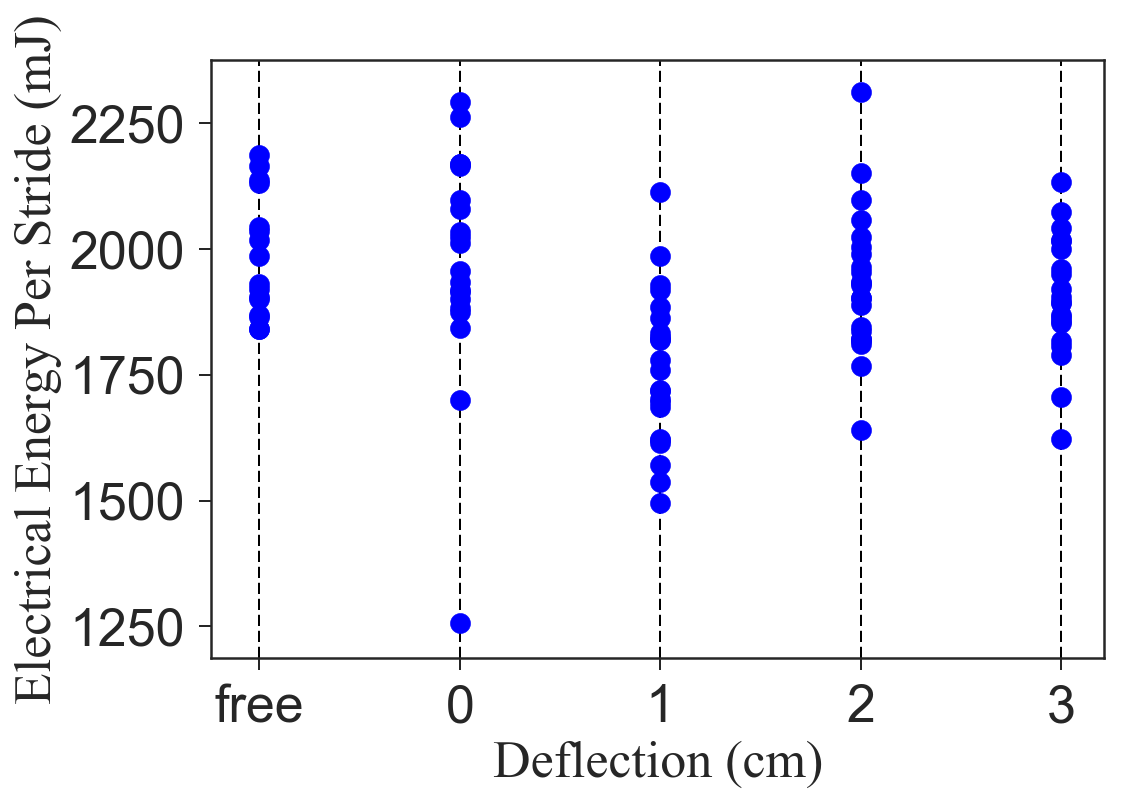

In [19]:
ee=all_ee
# plt.title("Cost of Transport/Stride for 4, 6, 8, 10, and 12cm (free)")
ax = plt.axes()
ax.xaxis.grid(True)
# plt.scatter([4]*len(cot['4']), cot['4'], s=100)
# plt.scatter([6]*len(cot['6']), cot['6'], s=100)
# plt.scatter([8]*len(cot['8']), cot['8'], s=100)
# plt.scatter([10]*len(cot['10']), cot['10'], s=100)
# plt.scatter([12]*len(cot['free']), cot['free'], s=100)
my_xticks=["free","0","1","2","3"]
plt.scatter([3]*len(ee['4']), ee['4'], s=100,c='b')
plt.scatter([2]*len(ee['6']), ee['6'], s=100,c='b')
plt.scatter([1]*len(ee['8']), ee['8'], s=100,c='b')
plt.scatter([0]*len(ee['10']), ee['10'], s=100,c='b')
plt.scatter([-1]*len(ee['free']), ee['free'], s=100,c='b')
# plt.rc('grid', linestyle=":", color='black')
xfont = {'fontname':'Times New Roman'}
ax.set_ylabel("Electrical Energy Per Stride (mJ)",fontdict=xfont, fontsize=26)
ax.set_xlabel("Deflection (cm)",fontdict=xfont,fontsize=26)
ax.tick_params(axis='both', which='both', labelsize=26)
ax.set_xticks((-1,0,1,2,3))
ax.set_xticklabels(my_xticks)


